(perioperative)=
# Perioperative Risk

*These trivial matters—diet, locality, climate, and one's mode of recreation, the whole casuistry of self-love—are inconceivably more important than, all that which has hitherto been held in high esteem!*       
-- [Why I am so clever](https://www.gutenberg.org/files/52190/52190-h/52190-h.htm), Ecce Homo 
 

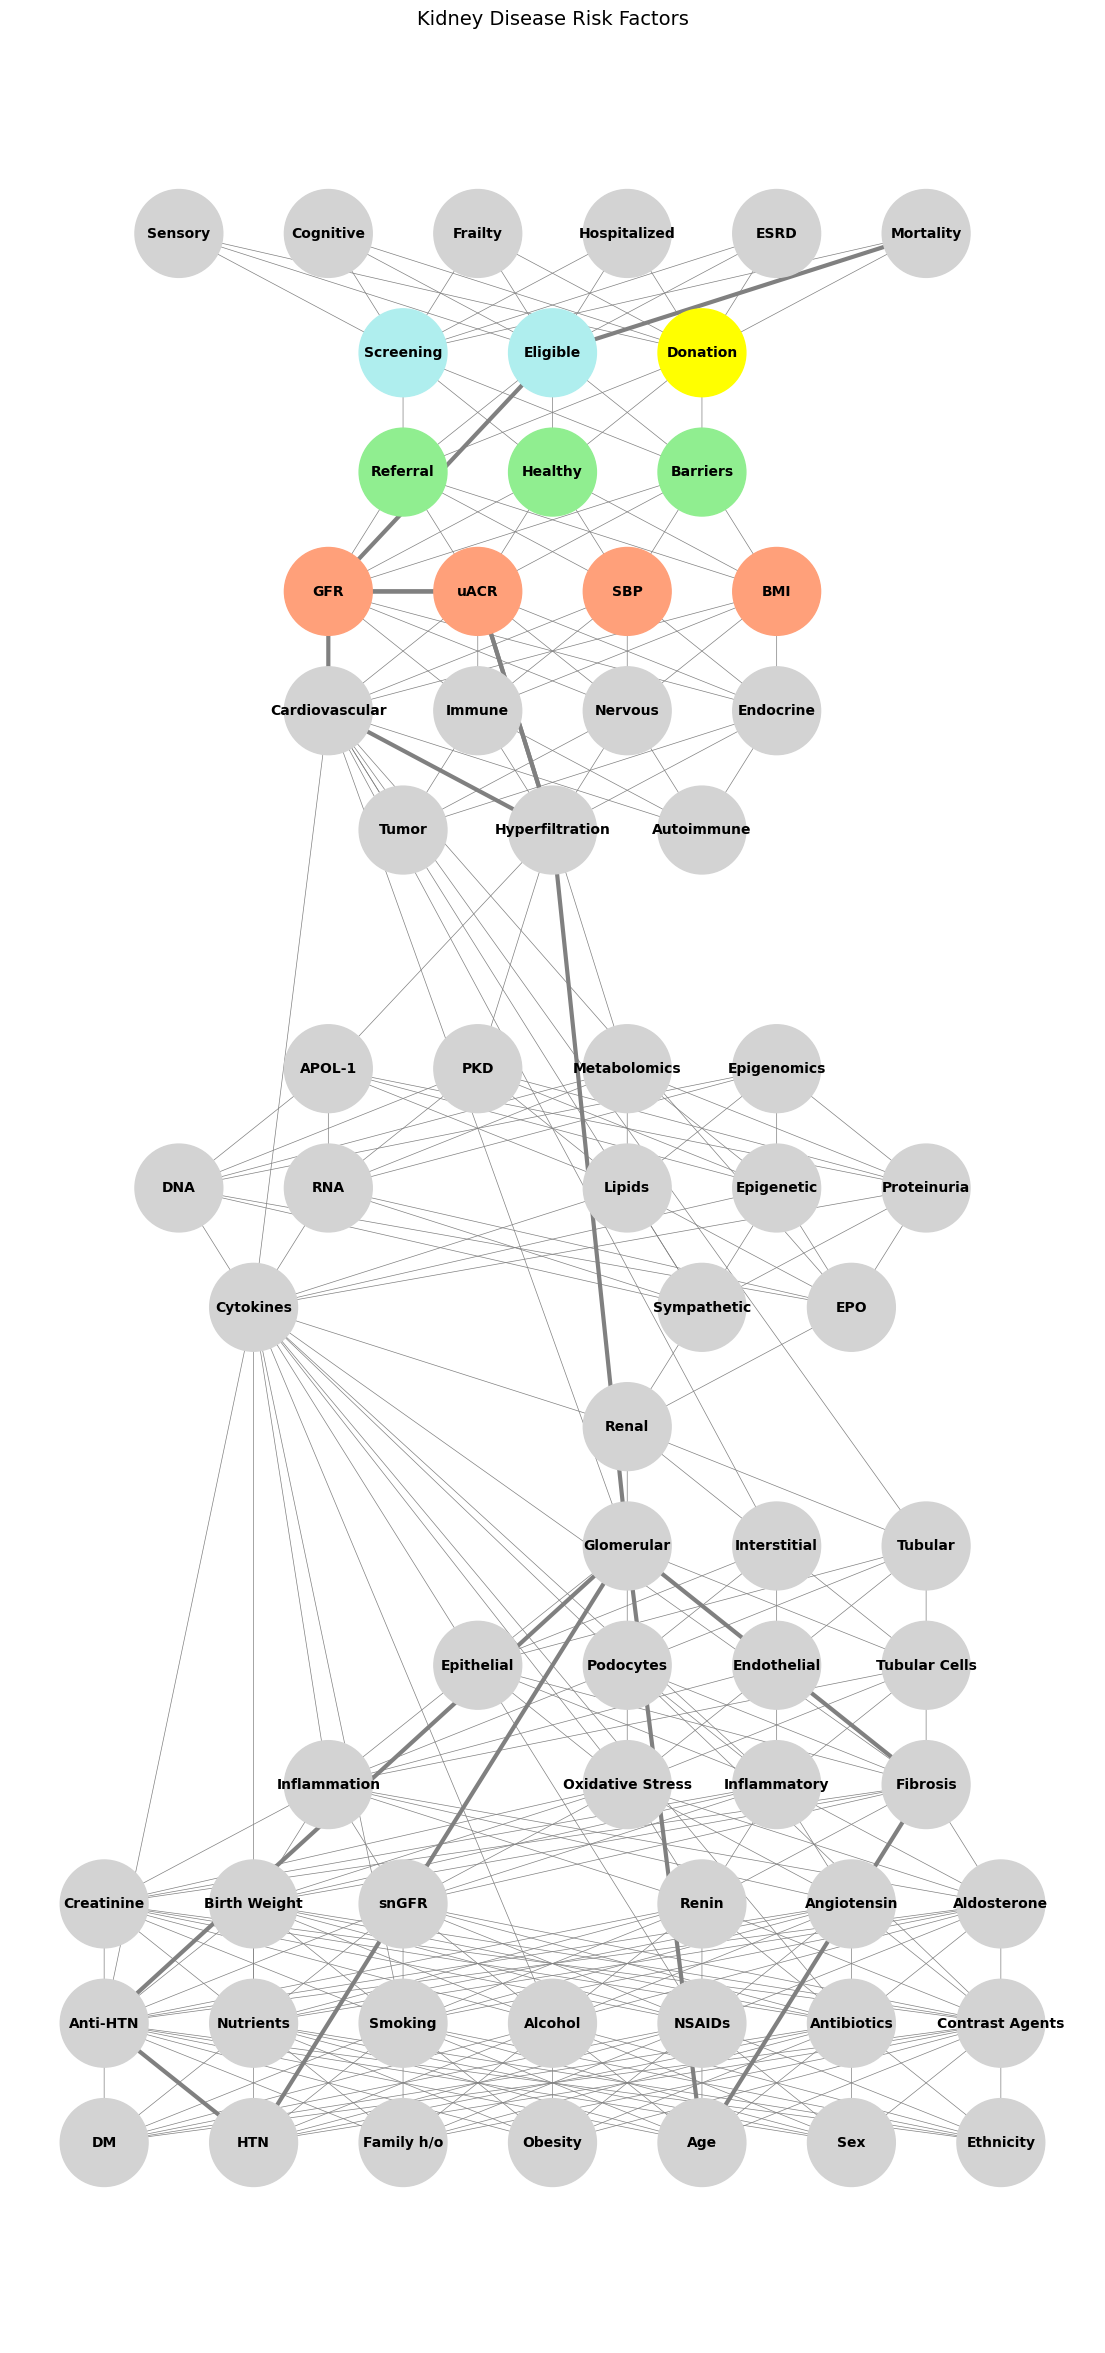

In [76]:

import networkx as nx
import matplotlib.pyplot as plt

# Define layers for the input (compression) phase
input_layers = {
    "Biology": ['DM', 'HTN', 'Family h/o', 'Obesity'],
    "Drugs and External Factors": ['Anti-HTN', 'Nutrients', 'Smoking', 'Alcohol'],
    "Ligands & Receptors": ['Creatinine', 'Birth Weight', 'snGFR', 'Cytokines'],
    "Pathways": ['Oxidative Stress', 'Inflammation', 'Fibrosis'],
    "Cells": ['Podocytes', 'Endothelial', 'Epithelial'],
    "Tissues": ['Glomerular', 'Interstitial', 'Tubular'],
    "Systems": ['Renal', 'Cardiovascular'],
    "Immuno-Neuro-Endocrinology": ['Cytokines', 'Sympathetic', 'EPO'],
    "Molecular Biology": ['DNA', 'RNA', 'Proteinuria', 'Lipids'],
    "Omics": ['APOL-1', 'PKD', 'Metabolomics', 'Epigenomics'],
    "Quantum": []
}

# Define layers for the output (decompression) phase
output_layers = {
    # "Molecular Outputs": ['Electron Transfer', 'Molecular Stability', 'Reaction Dynamics'],
    # "Cellular Behavior": ['ATP Production', 'Membrane Potential', 'DNA Repair', 'Protein Synthesis'],
    "Tissue-Level Dynamics": ['Tumor', 'Hyperfiltration', 'Autoimmune'],
    "Organ Systems": ['Cardiovascular', 'Immune', 'Nervous', 'Endocrine'],
    "Physiological States": ['GFR', 'uACR', 'SBP', 'BMI'],
    "Behavioral and Psychological Outcomes": ['Referral', 'Healthy', 'Barriers'],
    "Sociological and Environmental Interactions": ['Screening', 'Eligible', 'Donation'],
    "Functional Health Outcomes": ['Sensory', 'Cognitive', 'Frailty', 'Hospitalized', 'ESRD', 'Mortality']
}

# Update nodes with kidney disease risk factors
kidney_disease_risk_factors = {
    "Biology": ['Age', 'Sex', 'Ethnicity'],
    "Drugs and External Factors": ['NSAIDs', 'Antibiotics', 'Contrast Agents'],
    "Ligands & Receptors": ['Renin', 'Angiotensin', 'Aldosterone'],
    "Pathways": ['Oxidative Stress', 'Inflammatory', 'Fibrosis'],
    "Cells": ['Podocytes', 'Endothelial', 'Tubular Cells'],
    "Tissues": ['Glomerular', 'Interstitial', 'Tubular'],
    "Systems": ['Renal', 'Cardiovascular'],
    "Immuno-Neuro-Endocrinology": [ 'Sympathetic', 'EPO'],
    "Molecular Biology": ['Epigenetic', 'Proteinuria'],
# "Omics": ['ckd-Genomics', 'u-Proteomics', 'ckd-Metabolomics'],
    "Quantum": []  # No known direct risk factors at this level
}

# Merge input and output layers
full_layers = {**input_layers, **output_layers}
for layer_name, risk_factors in kidney_disease_risk_factors.items():
    if layer_name in full_layers:
        full_layers[layer_name].extend(risk_factors)

# Initialize the graph
G_full_biology = nx.DiGraph()

# Add nodes for each layer
for layer_name, nodes in full_layers.items():
    G_full_biology.add_nodes_from(nodes, layer=layer_name)

# Connect layers sequentially
layer_names = list(full_layers.keys())
for i in range(len(layer_names) - 1):
    source_layer = full_layers[layer_names[i]]
    target_layer = full_layers[layer_names[i + 1]]
    for source_node in source_layer:
        for target_node in target_layer:
            G_full_biology.add_edge(source_node, target_node)

# Add additional edges to "Hyperfiltration"
extra_edges = ["APOL-1", "PKD", "Metabolomics"]
for node in extra_edges:
    G_full_biology.add_edge(node, "Hyperfiltration", weight=0.5)

# Define node positions for visualization (inverted layout)
pos_full_biology = {}
layer_spacing = 2  # Space between layers
node_spacing = 1.5  # Space between nodes within a layer

for i, (layer_name, nodes) in enumerate(full_layers.items()):
    y = i * layer_spacing - (len(layer_names) - 1) * layer_spacing / 2  # Inverted vertical alignment
    for j, node in enumerate(nodes):
        x = j * node_spacing - (len(nodes) - 1) * node_spacing / 2  # Center nodes horizontally within layer
        pos_full_biology[node] = (x, y)

# Define specific colors for the Stress Dynamics pathway
highlighted_layers = {
    "Physiological States": "lightsalmon",
    "Behavioral and Psychological Outcomes": "lightgreen",
    "Sociological and Environmental Interactions": "paleturquoise"
}

node_colors = []
for node in G_full_biology.nodes():
    if node == "Donation":
        node_colors.append("yellow")
    else:
        for layer_name, color in highlighted_layers.items():
            if node in full_layers[layer_name]:
                node_colors.append(color)
                break
        else:
            node_colors.append("lightgray")

# Highlight the Stress Pathway
stress_path = [
    "Age", "Fibrosis", "Glomerular", #"Renal", #"u-Proteomics", # "Hyperfiltration",
    "HTN", "Anti-HTN", "Glomerular",  
    "Age", "Fibrosis", # "Hyperfiltration",
    # "Contrast Agents", "Hyperfiltration", 
    "Glomerular", "Hyperfiltration", "uACR",
    "Hyperfiltration", "Cardiovascular", "GFR",
    "uACR", "GFR", "Eligible", 
    # "uACR", "Healthy", "Eligible", 
    # "uACR", "Barriers", "Eligible", 
    "Mortality"
]

for i in range(len(stress_path) - 1):
    G_full_biology.add_edge(stress_path[i], stress_path[i + 1], weight=5)

edge_widths = []
for u, v in G_full_biology.edges():
    if (u, v) in zip(stress_path, stress_path[1:]):
        edge_widths.append(3)  # Highlighted path
    else:
        edge_widths.append(0.5)

# Draw the graph
plt.figure(figsize=(14, 30))
nx.draw_networkx_nodes(G_full_biology, pos_full_biology, node_size=4000, node_color=node_colors)
nx.draw_networkx_labels(G_full_biology, pos_full_biology, font_size=10, font_weight="bold")
nx.draw_networkx_edges(G_full_biology, pos_full_biology, width=edge_widths, edge_color="gray")
plt.title("Kidney Disease Risk Factors", fontsize=14)
plt.axis('off')
plt.show()


```{figure} ../figures/blanche.*
---
width: 1%
height: 1%
---
_ Some Known Kidney Disease Risk Factors_. In multivariable regression, uncertainty often stems from unmeasured variables, overlapping pathways, or interactions that remain unexplored. Within this network, pathways and connections that are not explicitly highlighted can symbolically represent this uncertainty. They serve as latent nodes, capturing the complex, multivariate interplay of risk factors that escape direct measurement or interpretation. This ambiguity is inherent in any attempt to model biological systems, emphasizing the need for ongoing refinement of predictive frameworks and acknowledgment of unknowns in causative relationships. By explicitly listing these risk factors, we invite dialogue regarding what factors aren't listed here, and what datasets might be available that haven't yet been explored. The highlighted pathway includes variables available in NHANES, which we used as the source population for the healthy nondonor population. For SRTR, which we used as the source population for the kidney donor population, most of these variables were missing. However, _a priori_ we know that the highlighted "Donation" node encodes many of these variables, given the very stringent criteria for a donor candidate to be deemed eligible and proceed to donate. Abbreviations- GFR: glomerular filtration rate; uACR: urine albumin-creatinine ratio.

```